## SGD regressor

In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta=1e-2, n_epochs=3000):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
        
    
    def fit(self, X, y):
        # X.shape is (n_rows, n_cols) == (n_samples, n_features)
        X_t = np.hstack([np.ones(shape=(X.shape[0], 1)), X])
        w = np.zeros(shape=X_t.shape[1])
        
        # each iteration is weights update
        for iteration in range(self.n_epochs):
            
            # random row for learning at this iteration
            i = np.random.randint(low=0, high=X_t.shape[0])
            
            new_w = w.copy()
            new_w[0] += self.eta * (y[i] - w.dot(X_t[i, :]))
            
            for j in range(1, X_t.shape[1]):
                new_w[j] += self.eta * (y[i] - w.dot(X_t[i, :])) * X_t[i, j]
                
            w = new_w.copy()
            
            self.weights_.append(w)
            self.mse_.append(sum([diff**2 for diff in (y - X_t.dot(w))]) / len(X_t))
            
        self.w_ = self.weights_[np.argmin(self.mse_)]
        
        return self
    
    def predict(self, X):
        X_t = np.hstack([np.ones(shape=(X.shape[0], 1)), X])
        
        return X_t.dot(self.w_)

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
data_demo = pd.read_csv(DATA_PATH + "weights_heights.csv")

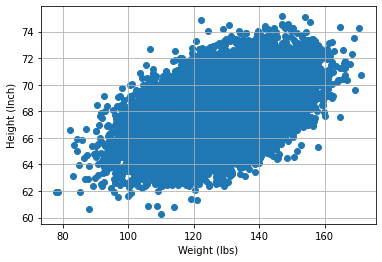

In [5]:
plt.scatter(data_demo["Weight"], data_demo["Height"])
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (Inch)")
plt.grid();

In [6]:
X, y = data_demo["Weight"].values, data_demo["Height"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

In [9]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_scaled, y_train)

SGDRegressor()

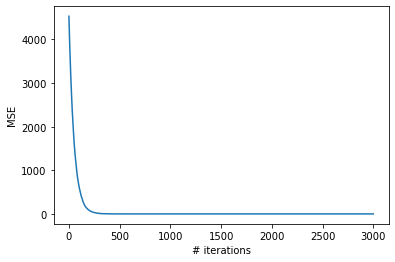

In [10]:
plt.plot(range(len(sgd_reg.mse_)), sgd_reg.mse_)
plt.xlabel("# iterations")
plt.ylabel("MSE");

In [11]:
np.min(sgd_reg.mse_), sgd_reg.w_

(2.7151458840249343, array([67.98712348,  0.94801227]))

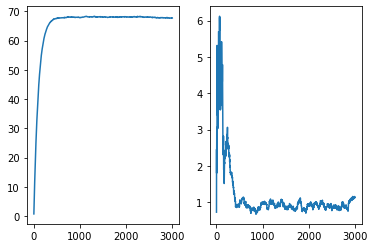

In [12]:
plt.subplot(121)
plt.plot(range(len(sgd_reg.weights_)), [w[0] for w in sgd_reg.weights_])
plt.subplot(122)
plt.plot(range(len(sgd_reg.weights_)), [w[1] for w in sgd_reg.weights_]);

In [13]:
sgd_test_mse = mean_squared_error(y_test, sgd_reg.predict(X_test_scaled))
sgd_test_mse

2.67073289805628

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train_scaled, y_train)
print(lm.coef_, lm.intercept_)
linreg_test_mse = mean_squared_error(y_test, lm.predict(X_test_scaled))
linreg_test_mse

[0.94537278] 67.98930834742858


2.670830767667635

In [15]:
try:
    assert (sgd_test_mse - linreg_test_mse) < 1e-4
    print("Correct!")
except AssertionError:
    print(
        "Not correct.\n Linreg's test MSE: {}"
        "\n SGD's test MSE: {}".format(linreg_test_mse, sgd_test_mse)
    )

Correct!
